In [2]:
#Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an Image Classifier

Firts install an import TensorFlow and Keras

    pip install tensorflow==2.0.0

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
tf.__version__

'2.0.0'

# 24. Image Classifier

Link https://keras.io/api/datasets/fashion_mnist/

Dataset of 60,000 28x28 graysacle iamges of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

In [6]:
df = pd.DataFrame()
label_list=[]
for i in range(10):
    label_list.append(str(i))
    
description_list = ["T-shirts/Top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

df['Label'] = label_list
df['Description'] = description_list

#print(df)
display(df)

,Label,Description
0,0,T-shirts/Top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


#### Usage

    from keras.datasets import fashion_mnist
>(x_train, y_train), (x-test, y_test) = fashion_mnist.load_data()

Returns 2 tuples:

    1. x_train, x_test: unit8 array of grayscale image data with shape (num_samples, 28, 28)
    
    2. y_train, y_test: unit8 array of labels (integers in range 0-9) with shape(num_samples).


In [7]:
# Load data form Keras dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

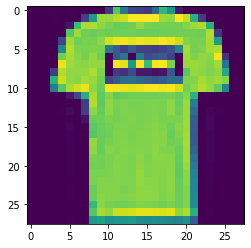

In [8]:
plt.imshow(X_train_full[1])

In [9]:
y_train_full[1]

0

In [10]:
# Saber a que clase pertenece
description_list[y_train_full[1]]

'T-shirts/Top'

In [11]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# 25. Data Normalization and Test-train split

We then normalize the data dimensions so that they are of approximately the same scale

In [12]:
X_train_n = X_train_full / 255
X_test_n = X_test /255

#### Split the data into train/validation/test datasets

In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into tran/validation. Here is how each type of dataset is used in DL:

- __Training data__ : used for training the model
- __Validation data__: used for tunning the hyperparameters and evaluate the models
- __Test data__ : used to test the model after the model has gone through initial vetting by the validation set.

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

# 26. More about test-train split

Splitting the dataset into train, validation and test set is a very important step of the ML model building process. To learn more about this, check-out our video on __Why we split the data into Test, Train, and Validation sets__

Here's the link to the video: https://www.youtube.com/watch?v=dbMHdPf7ong

# 27. Different ways to create ANN using Keras

#### Create the Model Architecture

There are two APIs for defining  model in Keras:
- Sequential model API
    - Layer by layer models
- Functional API


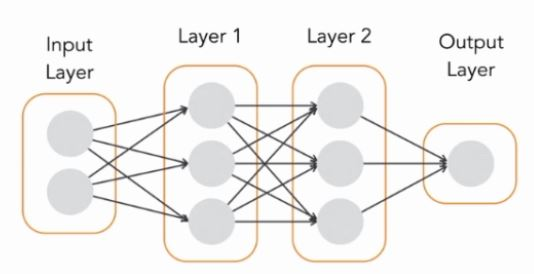

In [15]:
from IPython.display import Image
Image("images/sequential_api.jpg", height=400, width=400)

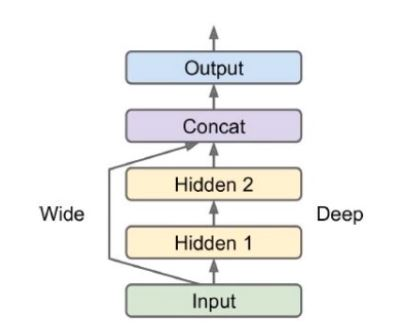

In [16]:
Image("images/functional_api.jpg", height=300, width=300)

# 28. Building a NN using Keras

In [17]:
# Inicializar semilla
np.random.seed(42)
#tensorflow
tf.random.set_seed(42)

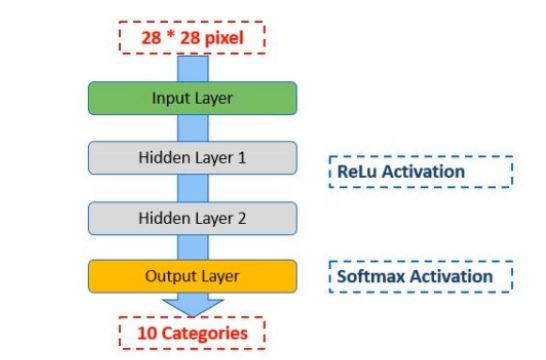

In [18]:
Image("images/img1.jpg", height=300, width=300)

In [19]:
# Tomando como referencia la imagen superior para crear la red neuronal (NN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # piexeles: 28x28
model.add(keras.layers.Dense(300, activation="relu")) # Nº neuronas: 300
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # Nº categorias: 10

# relu: 0 < 0 , value if  > 0

In [20]:
# Resumen de la NN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


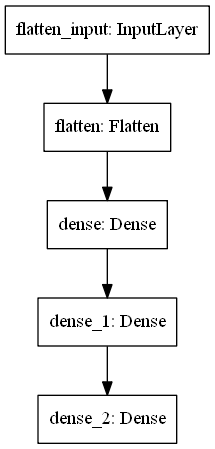

In [21]:
import pydot
from tensorflow.keras.utils import plot_model

# Visualizar la estructura de la NN
keras.utils.plot_model(model)

We can access the parameters using this method: __*get_weight()*__

In [76]:
weights, biases = model.layers[1].get_weights()

In [77]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [78]:
weights.shape

(784, 300)

In [79]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.